**UE 4268 - Examen 2023**

**`TIEMGNI KENMOE GODWILL JEZREEL`**, `18E2352` et `jezreel.tiemgni@facsciences-uy1.cm` 

Department of Physics - Faculty of Science - University of Yaoundé I

`PNR`

`19 Juin 2023`

In [1]:
from IPython.display import Image

# Algorithme de la VQE

**Cet exercice se traite exclusivement sur la feuille de composition**

L'algorithme du VQE (Variationnal Quantum Eigensolver) se résume en deux grandes parties qu'illustre la figure ci-dessous.
 
1. Expliquer pourquoi on dit que c'est un **algorithme hybride** en indiquant ce que fait chaque processeur. 
2. Qu'est-ce que la profondeur d'un circuit quantique et quelle son influence dans les algorithmes du VQE?

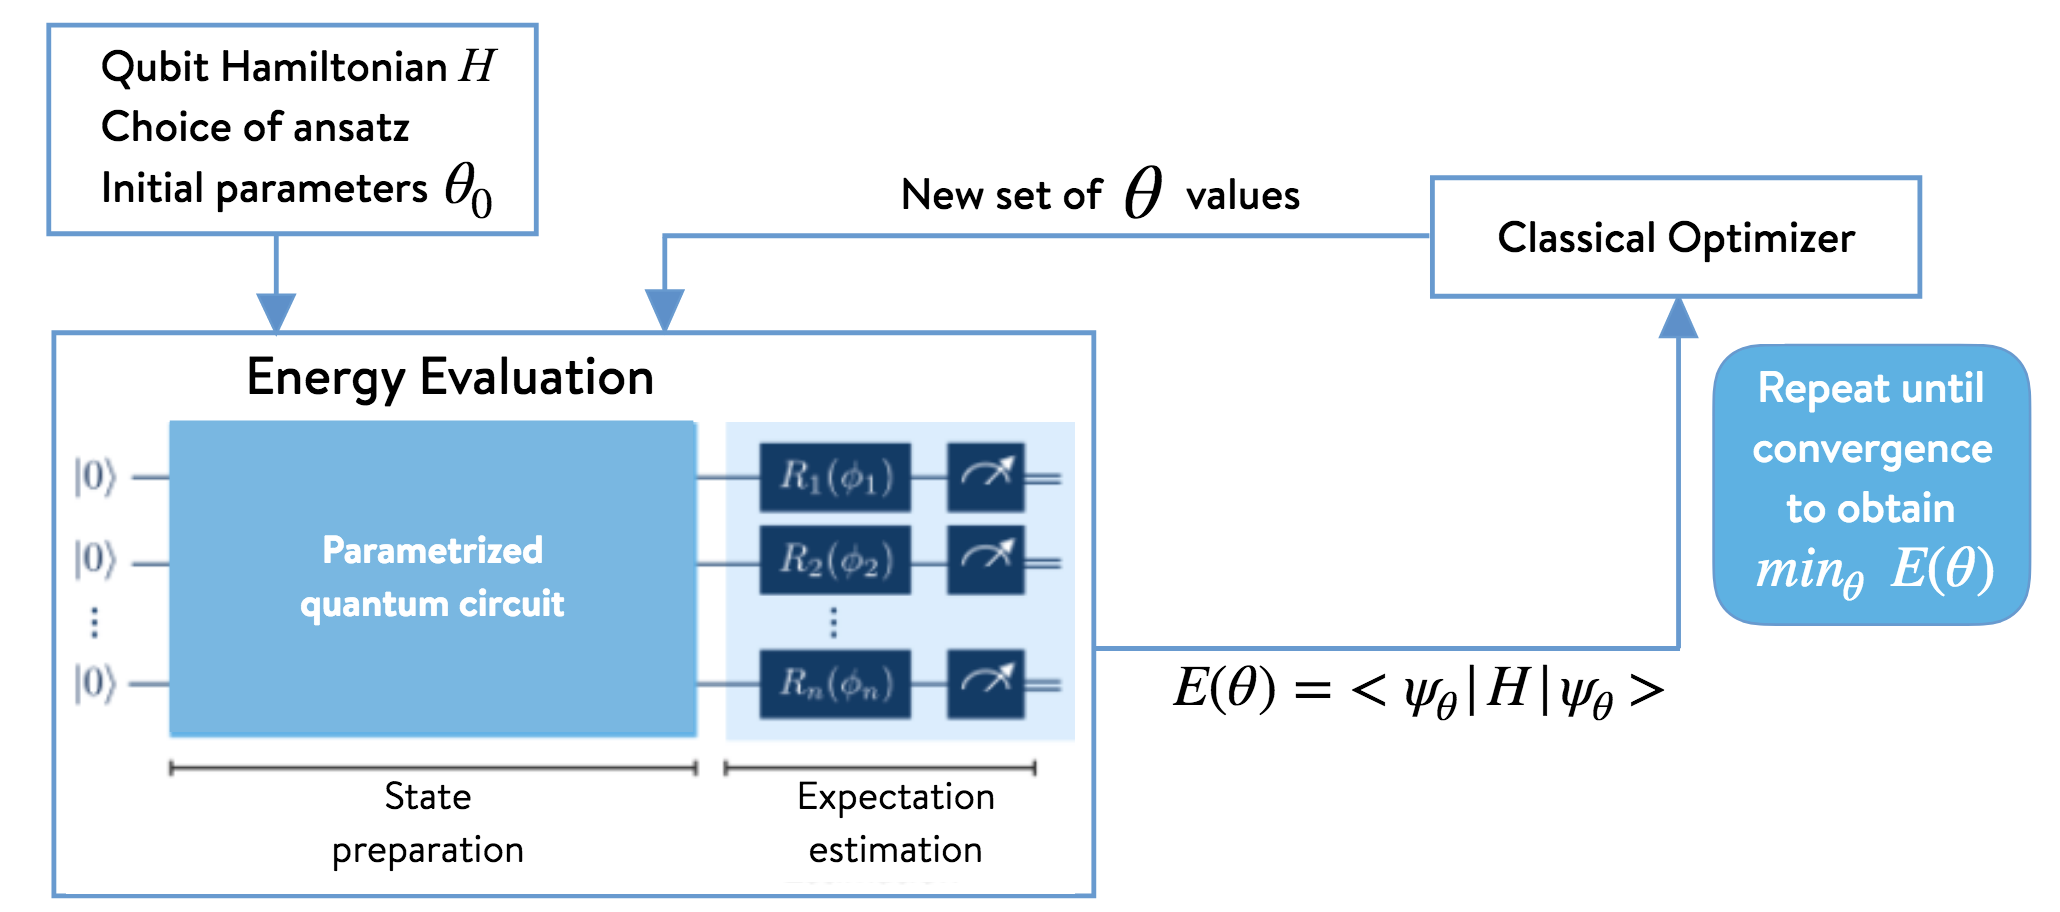

In [2]:
Image("./VQE_Diagram.png", width=600)

# Support Vector Regression to predict polarity of molecules

Write a python script that use a **support vector regression (SVR)** model to predict **TPSA** (**Topological polar surface area**, a physicochemical property describing the polarity of molecules) from molecules of the ZING Dataset contained in the file `'.Zn10.txt'`. The input - structural feature of molecules is Morgan fingerprint and the output is TPSA.

We recall that the **molecular fingerprint** represents the substructures of a molecule (array) as a vector of binary numbers. It is a molecular structure descriptor to use as input to reveal the relationship between molecular structure and properties, called **Quantitative Structure-Activity Relationships (QSAR)**.

The workflow is

1. Get molecular fingerprints of each molecule
2. Split the dataset to training set and test set
3. Train a SVR model
4. Check the accuracy of prediction with $R²$ and mean-square error
5. Visualize the results from the model.

**The various necessaries libraries and modules will be import only where they are needed**.


In [2]:
import sklearn
print(sklearn.__version__)

1.2.1


In [6]:
import rdkit
print(rdkit.__version__)

2023.03.1


In [11]:
### SVR ####

###
# 1 -- Get molecular fingerprints of each molecule
###

#-- chargement des données
# importation du module nécéssaire
    import os
    PATH = os.getcwd()
    data_path = os.path.join(PATH, './Zn10.txt')

#-- Exploration des données avec Pandas Data Frame
# importation du module
import pandas as pd

# ouverture des données
with open(data_path, 'r') as f:
    content = f.readlines()
    smile = [smi.split()[0] for smi in content]

# conversion en dataframe
df = pd.DataFrame(data=smile, columns=['Smiles'])
df

Smiles
0             NC(=O)C1CCCCC1C(F)(F)F
1               CCCCCNC(=O)N1CCCC1CO
2            CCC(CC)c1cc(C[NH3+])on1
3         C[NH2+]C1CCC(c2ccccc2Cl)C1
4     COc1ccc2c(c1)C(C(C)[NH3+])CN2C
...                              ...
5995    COCC(C)NS(=O)(=O)c1cccc(N)c1
5996   COc1ccc(C(C[NH3+])C2CC2)cc1OC
5997         CCCC[NH2+]C1CCc2ccccc21
5998  CC1CCCC([NH2+]Cc2cccc(O)c2)C1C
5999        CCC(C)NC(=O)NCCC(=O)[O-]

[6000 rows x 1 columns]

In [ ]:
# notre table contient des SMILES que nous allons convertir en des molécules RDKIT
# importation du module
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, PandasTools, Descriptors

PandasTools.AddMoleculeColumnToFrame(frame=df, smilesCol='Smiles', molCol='Molecules')
df

In [13]:
# !! Attention: vérifions qu'il n'y ai pas de lignes où RDKIT n'a pas réussi à 
# générer des molécules à partir de SMILES
df.isnull().sum()

Smiles       0
Molecules    0
dtype: int64

In [18]:
# Évaluons sur certains descripteurs, les propriétés physico-chimiques de nos composés.
def calculate_descriptors(mol):
    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hbd = Descriptors.NumHDonors(mol)
    hba = Descriptors.NumHAcceptors(mol)
    psa = Descriptors.TPSA(mol)
    rb = Descriptors.NumRotatableBonds(mol)
    rg = Descriptors.NumAromaticRings(mol)
    qed = Chem.QED.qed(mol)
    return [mw, logp, hbd, hba, psa, rg, rb, qed]

molecule = df.iloc[:, 1].values
descriptors = [calculate_descriptors(mol) for mol in molecule]

# Conversion des descripteurs en dataFrame
descriptors_df = pd.DataFrame(descriptors, columns=['MW', 'LogP', 'HBD', 'HBA', 'PSA', 'Aromatic Rings', 'Rotatable Bonds', 'QED'])
data = pd.concat([df, descriptors_df], axis=1)
data

Smiles  \
0             NC(=O)C1CCCCC1C(F)(F)F   
1               CCCCCNC(=O)N1CCCC1CO   
2            CCC(CC)c1cc(C[NH3+])on1   
3         C[NH2+]C1CCC(c2ccccc2Cl)C1   
4     COc1ccc2c(c1)C(C(C)[NH3+])CN2C   
...                              ...   
5995    COCC(C)NS(=O)(=O)c1cccc(N)c1   
5996   COc1ccc(C(C[NH3+])C2CC2)cc1OC   
5997         CCCC[NH2+]C1CCc2ccccc21   
5998  CC1CCCC([NH2+]Cc2cccc(O)c2)C1C   
5999        CCC(C)NC(=O)NCCC(=O)[O-]   

                                             Molecules       MW    LogP  HBD  \
0     <rdkit.Chem.rdchem.Mol object at 0x7f1a96e66c70>  195.184  1.8404    1   
1     <rdkit.Chem.rdchem.Mol object at 0x7f1a96e66ce0>  214.309  1.3429    2   
2     <rdkit.Chem.rdchem.Mol object at 0x7f1a96e66d50>  169.248  1.3201    1   
3     <rdkit.Chem.rdchem.Mol object at 0x7f1a96e66dc0>  210.728  2.1693    1   
4     <rdkit.Chem.rdchem.Mol object at 0x7f1a96e66e30>  207.297  0.8590    1   
...                                                ...      ...     ...  ...   
5995  <rdkit.Chem.rdchem.Mol object at 0x7f1a96f542e0>  244.316  0.5820    2   
5996  <rdkit.Chem.rdchem.Mol object at 0x7f1a96f54350>  222.308  1.4393    1   
5997  <rdkit.Chem.rdchem.Mol object at 0x7f1a96f543c0>  190.310  2.0374    1   
5998  <rdkit.Chem.rdchem.Mol object at 0x7f1a96f54430>  234.363  2.2803    2   
5999  <rdkit.Chem.rdchem.Mol object at 0x7f1a96f544a0>  187.219 -0.7759    2   

      HBA    PSA  Aromatic Rings  Rotatable Bonds       QED  
0       1  43.09               0                1  0.681153  
1       2  52.57               0                5  0.678579  
2       2  53.67               1                4  0.738657  
3       0  16.61               1                2  0.770859  
4       2  40.11               1                2  0.781030  
...   ...    ...             ...              ...       ...  
5995    4  81.42               1                5  0.742397  
5996    2  46.10               1                5  0.819062  
5997    0  16.61               1                4  0.699701  
5998    1  36.84               1                3  0.826891  
5999    3  81.26               0                5  0.592315  

[6000 rows x 10 columns]

In [19]:
# Évaluons l'empreinte de chaque molécule dans notre ensemble de données.
# importation du module
import numpy as np

fps = []
for mol in molecule:
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
    fp_arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, fp_arr)
    fps.append(fp)
    
# conversion des empreintes en tableau
fps = np.asarray(fps)
fps

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [20]:
###
# 2 -- Split the dataset to training set and test set
###

# Nous vérifions que nos entrées/sorties ont le même nombre de ligne
logp = data.iloc[:, 3].values
logp.shape[0] == fps.shape[0]

True

In [24]:
# Maintenant procédons à la séparation
# importation du module
from sklearn.model_selection import train_test_split

seed = np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(fps, logp, train_size=0.8, random_state=seed)

In [26]:
###
# 3 -- Train a SVR model
###

# importation du module
from sklearn.svm import SVR

svr = SVR()
_ = svr.fit(X_train, y_train)

In [32]:
###
# 3 -- Check the accuracy of prediction with 𝑅² and mean-square error
###

# Check the accuracy of prediction with 𝑅² and mean-square error
# Après entraînement, nous vérifions la précision de notre prédiction.
# importation du module
from sklearn.metrics import mean_squared_error, r2_score

logp_predict = svr.predict(X_test)
r2 = r2_score(y_test, logp_predict)
mse = mean_squared_error(y_test, logp_predict)

print('Le score 𝑅² est : ', format(r2))
print('Le mean square est : ', format(mse))

Le score 𝑅² est :  0.8907400875892015
Le mean square est :  0.19215635860664254


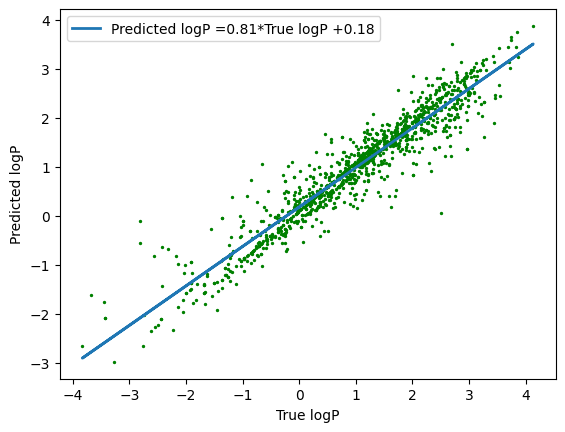

In [36]:
###
# 4 -- Visualize the results from the model.
###

# importation des modules
import matplotlib.pyplot as plt
from scipy import stats

vect_norm, intercept, r_value, p_value, std_error = stats.linregress(y_test, logp_predict)
fx = vect_norm * y_test + intercept

plt.scatter(y_test, logp_predict, color='green', s=2)
plt.plot(y_test, fx, label='Predicted logP ='+str(round(vect_norm,2))+'*True logP +'+str(round(intercept,2)), linewidth=2)
plt.xlabel('True logP')
plt.ylabel('Predicted logP')
plt.legend()
plt.show()

# Calculer l'état fondamental de la molécule de phenylsulfonyl-carbazole (PSPCz)

Les calculateurs quantiques pourraient être des outils inestimables pour étudier la structure électronique et les propriétés dynamiques de molécules et de matériaux complexes, car il est plus logique de modéliser des systèmes de la physique quantique sur un dispositif quantique que sur un calculateur classique. Le phenylsulfonyl-carbazole (PSPCz) dont la formule moléculaire est $C_{18}H_{13}NO_2S$ et son SMILES isomérique est C1=CC=C(C=C1)S(=O)(=O)C2=CC=CC3=C2NC4=CC=CC=C34, a des propriétés émettrices utiles de fluorescence retardée activée thermiquement (TADF) pour les applications de diodes électroluminescentes organiques (OLED). Son Hamiltonien en représentation de Pauli $\{\mathtt{I,\,X,\,Y,\,Z}\}$ est

$$ \mathtt{H} = h_1(\mathtt{I}\otimes\mathtt{I}) + h_2(\mathtt{Z}\otimes\mathtt{I} - \mathtt{I}\otimes\mathtt{Z}) + h_3(\mathtt{Z}\otimes\mathtt{Z}) + h_4(\mathtt{x}\otimes\mathtt{X}) + h_5(\mathtt{X}\otimes\mathtt{I} + \mathtt{I}\otimes\mathtt{X} + \mathtt{X}\otimes\mathtt{Z} - \mathtt{Z}\otimes\mathtt{X}),$$

où les coefficients 
$$h_1 = -0.518418,\, h_2 = -0.136555,\, h_3 = -0.025866,\, h_4 = 0.015725,\, h_5 = -0.000296.$$

1. Utiliser `rdkit.Chem` pour représenter en 2D de molécule PSPCz à partir de son SMILES.

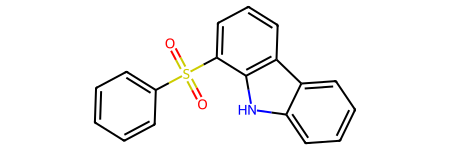

In [40]:
###
# 1 -- Utilisation de rdkit.Chem pour représenter en 2D la molécule de PSPCz à partir de son SMILES
###

smi = 'C1=CC=C(C=C1)S(=O)(=O)C2=CC=CC3=C2NC4=CC=CC=C34'
m = Chem.MolFromSmiles(smi) # ici on converti les smiles en molécules
m

2. Utiliser, pour calculer l'état fondamental de la molécule PSPCz,
   * `qiskit.opflow.operator_globals` et 
   * `qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver`.

In [68]:
###
# 2 -- Calcul de l'état fondamental de la molécule PSPCz
###

# importation des modules
from qiskit.opflow.operator_globals import I, X, Y, Z
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver

h1 = -0.518418
h2 = -0.136555
h3 = -0.025866
h4 = 0.015725
h5 = -0.000296

H = h1 * (I.tensor(I)) + h2 * (Z.tensor(I) - I.tensor(Z)) + h3 * (Z.tensor(Z)) + h4 * (X.tensor(X)) + h5 * (X.tensor(I) + I.tensor(X) + X.tensor(Z) - Z.tensor(X))
print(H)

-0.518418 * II
- 0.136555 * ZI
+ 0.136555 * IZ
- 0.025866 * ZZ
+ 0.015725 * XX
- 0.000296 * XI
- 0.000296 * IX
- 0.000296 * XZ
+ 0.000296 * ZX


In [70]:
# Calcul du resultat
exact_result = NumPyMinimumEigensolver().compute_minimum_eigenvalue(H)
print(f'La valeur exact de l\'energie à l\'état fondamental est : {exact_result.eigenvalue}')

La valeur exact de l'energie à l'état fondamental est : -0.7661143312147406


# VQE avec un Hardware Efficient Ansatz (HEA)

1. Utiliser  `qiskit.circuit.library.EfficientSU2` pour reproduire le Hardware Efficient Ansatz (HEA) suivant : 

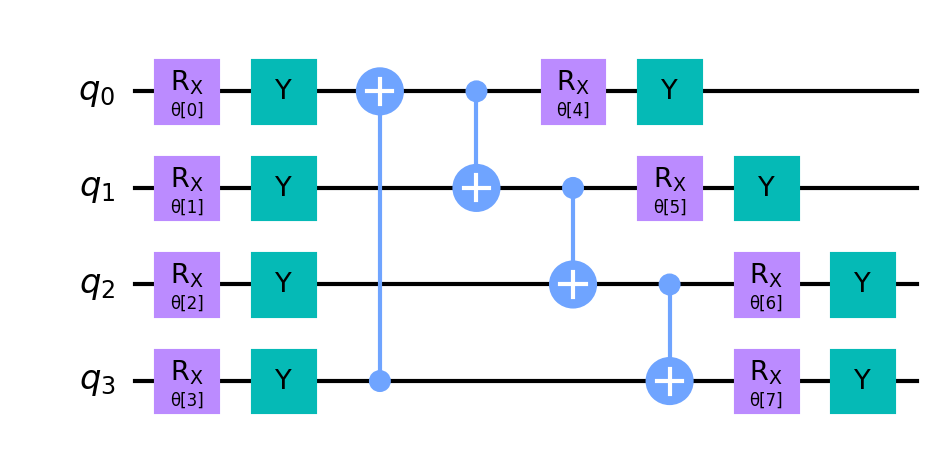

In [3]:
Image(filename='./SU2_Ansatz.png', width=400)

In [ ]:
###
# 1 -- utiliser qiskit.circuit.library.EfficientSU2 pour reproduire le HEA
###

# importation du module
from qiskit.circuit.library import EfficientSU2

SU2ansatz2 = EfficientSU2(4, su2_gates=['rx', 'y'], entanglement='circular', reps=1)
SU2ansatz2.decompose().draw('latex')

2. Utiliser ce HEA (que l'on nommera `SU2ansatz`) dans l'algorithme VQE, définit ci-dessous par la fonction `algorithm(problem, mapper, optimizer)`, pour calculer l'état fondamental de la molécule $H_2$.

In [ ]:
from qiskit.primitives import Estimator
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

import numpy as np

def algorithm(problem, mapper, optimizer):
    """ Setup VQE solver algorithm

    Args:
        problem : Electronic Structure Problem
        mapper : qubit mapper 
        optimizer : optimizer

    Returns: vqe solver algorithm
    """    
    
    #ansatz
    ansatz = SU2ansatz # previously constructed
    
    #VQE algorithm solver
    vqe_solver = VQE(Estimator(), ansatz, optimizer)
    vqe_solver.initial_point = np.zeros(ansatz.num_parameters)
 
    # Ground state computation using a minimum eigensolver
    algorithm = GroundStateEigensolver(mapper, vqe_solver)
       
    # Compute Ground State properties.
    algorithm = algorithm.solve(problem)
    
    return algorithm

In [ ]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.transformers import FreezeCoreTransformer

H2_driver = PySCFDriver(
    atom='H .0 .0 -0.3625; H .0 .0 0.3625',
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)
# Electronic structure problem
H2_problem = H2_driver.run()
transformer = FreezeCoreTransformer()
H2_problem = transformer.transform(H2_problem)

In [ ]:
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.mappers import TaperedQubitMapper
from qiskit.algorithms.optimizers import SLSQP

# Put your code here